**1.Import libraries:**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import r2_score

**2.Read file and drop unwanted columns**

In [52]:
# Read the CSV file into a DataFrame
df = pd.read_csv('avocado_final.csv')

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0.1']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015


**3.Interpret the strength of the relationship between independent and dependent variable via the correlation matrix**

In [53]:
# List of independent variables from your dataset
independent_variables = ['Date','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year']

correlation_matrix = df.corr()
correlation_scores = []

for column in independent_variables:
  independent_variable = column
  dependent_variable = 'AveragePrice'
  correlation = correlation_matrix.loc[independent_variable, dependent_variable]
  correlation_scores.append(correlation)
  print(f"Correlation for {column} and Price is ",correlation)

Correlation for Date and Price is  0.1440702641931525
Correlation for Total Volume and Price is  -0.5080132229852251
Correlation for 4046 and Price is  -0.5290950398776959
Correlation for 4225 and Price is  -0.41605460070891137
Correlation for 4770 and Price is  -0.4704427286765799
Correlation for Total Bags and Price is  -0.4909110861793375
Correlation for Small Bags and Price is  -0.45294205001352433
Correlation for Large Bags and Price is  -0.428965605063577
Correlation for XLarge Bags and Price is  -0.3554433701914613
Correlation for type and Price is  0.6212923682184528
Correlation for year and Price is  0.09188540341180586


**4.Produce a scatterplots for each of the independent variable against the dependent variable (price)**

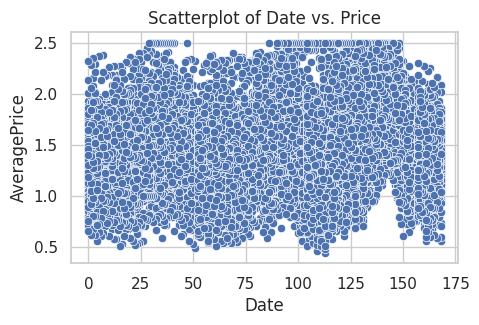

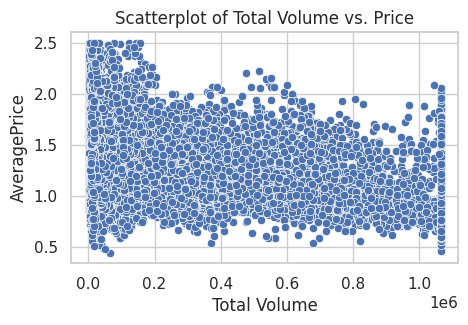

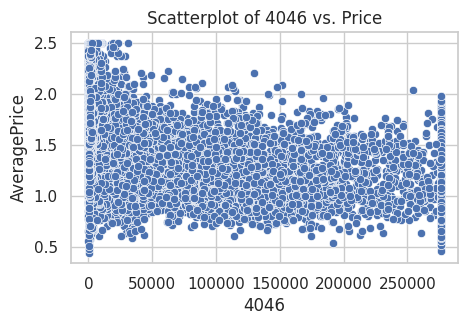

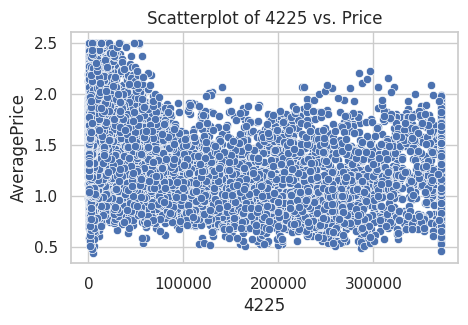

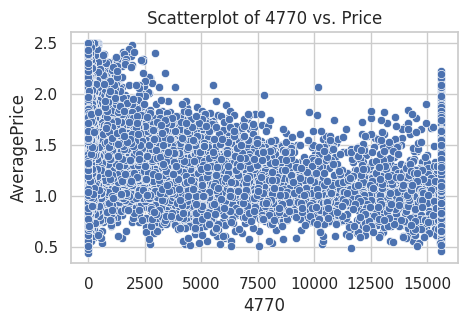

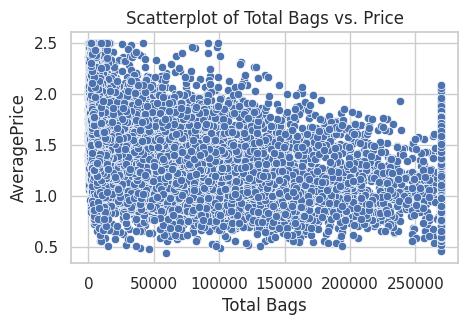

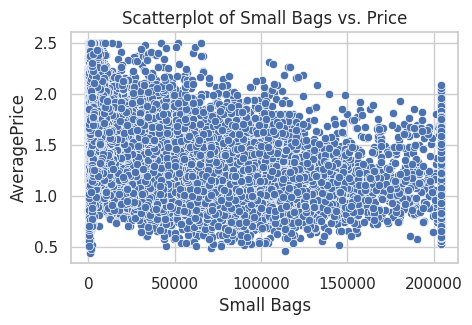

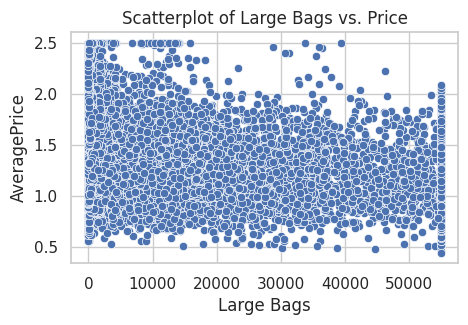

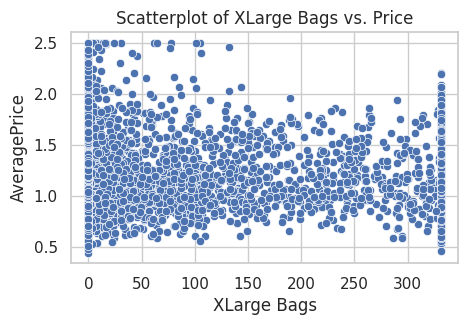

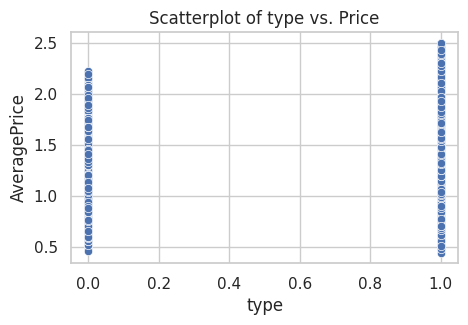

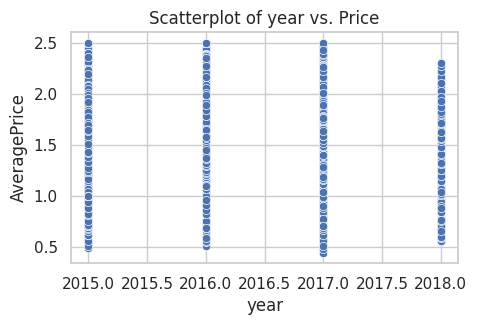

In [54]:
# Set the style of seaborn for better aesthetics (optional)
sns.set(style="whitegrid")

# Create scatterplots
for variable in independent_variables:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[variable], y=df['AveragePrice'])
    plt.title(f'Scatterplot of {variable} vs. Price')
    plt.xlabel(variable)
    plt.ylabel('AveragePrice')
    plt.show()

**5.Fit a linear model to the data to predict the prices of avocados using linear regression**

In [55]:
# Assuming 'AveragePrice' is the target variable and other columns are features
X = df.drop(columns=['AveragePrice'])  # Features
y = df['AveragePrice']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Initial R-squared score:", r2)

Initial R-squared score: 0.5052487073458576


**6.Assess the strength of the relationship between independent and dependent variables through statsmodels.summary()**

In [56]:
# Add a constant term to the features
X_train = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     1158.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:50:59   Log-Likelihood:                -2215.6
No. Observations:               14599   AIC:                             4457.
Df Residuals:                   14586   BIC:                             4556.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          587.6292     27.002     21.763   

**7.Find the threshold values using correlation matrix:**

In [57]:
columns_to_drop = ['AveragePrice']

negative_total = 0.0
positive_total = 0.0
neg_count = 0
pos_count = 0

for score in correlation_scores:
    if score < 0.0:
        negative_total += score
        neg_count += 1
    else:
        positive_total += score
        pos_count += 1

if neg_count > 0:
    neg_average = negative_total / neg_count
else:
    neg_average = 0.0

if pos_count > 0:
    pos_average = positive_total / pos_count
else:
    pos_average = 0.0

for i in range(len(correlation_scores)):
    if correlation_scores[i] < 0.0 and correlation_scores[i] >= neg_average:
        columns_to_drop.append(independent_variables[i])
    elif correlation_scores[i] >= 0.0 and correlation_scores[i] <= pos_average:
        columns_to_drop.append(independent_variables[i])

print("Attributes to be dropped: ",columns_to_drop)

Attributes to be dropped:  ['AveragePrice', 'Date', '4225', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


**8.Calculate final accuracy:**

In [58]:
# Assuming 'AveragePrice' is the target variable and other columns are features
X = df.drop(columns=columns_to_drop)  # Features
y = df['AveragePrice']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Final R-squared score:",r2)

Final R-squared score: 0.45611730343455603
